In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

In [20]:
# Import the dataset from Clustering Adapter
data = pd.read_csv("../Clustering Adapter/Adapter Output/result_w_vector.csv")
v_map = pd.read_csv("../Clustering Adapter/Adapter Output/vector_mapping.csv")
print(v_map.head())

data.head()
# data.info()

   Unnamed: 0  Size      Itemset
0           0     1  salty snack
1           1     1   whole milk
2           2     1       pastry
3           3     1       yogurt
4           4     1      sausage


,Unnamed: 0,Transaction,Vector
0,0,"['salty snack', 'pastry', 'whole milk']","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"['yogurt', 'semi-finished bread', 'whole milk'...","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"['soda', 'pickled vegetables']","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"['misc. beverages', 'canned beer']","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"['hygiene articles', 'sausage']","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [54]:
# Clustering Transaction based on Vector in data
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import ast
import numpy as np
# Convert string to list
import ast

data = pd.read_csv("../Clustering Adapter/Adapter Output/result_w_vector.csv")
v_map = pd.read_csv("../Clustering Adapter/Adapter Output/vector_mapping.csv")

# Load your data
df = data

# Convert string representation of list to actual list
df['Vector'] = df['Vector'].apply(lambda x: ast.literal_eval(x))

# Convert list of vectors into DataFrame
vector_df = pd.DataFrame(df['Vector'].to_list())

# Extract Vector column
X = vector_df.values

# Initialize AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and assign clusters
df['Cluster'] = agg_clustering.fit_predict(X)

# drop unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
# Show cluster membership in a table
print(df.head())
# Save the result to csv
df.to_csv('./Output Clusters/hierarchical_3_clusters.csv')

# Show scatter plot of data colored by cluster
import matplotlib.pyplot as plt

# # Convert 'Vectors' column to a list of lists
# vectors = df['Vector'].tolist()

# # Separate the vectors into two lists
# x_values = [vector[0] for vector in vectors]
# y_values = [vector[1] for vector in vectors]

# # Plot the data points
# plt.scatter(x_values, y_values, c=df['Cluster'], cmap='rainbow')
# plt.show()

                                         Transaction  \
0            ['salty snack', 'pastry', 'whole milk']   
1  ['yogurt', 'semi-finished bread', 'whole milk'...   
2                     ['soda', 'pickled vegetables']   
3                 ['misc. beverages', 'canned beer']   
4                    ['hygiene articles', 'sausage']   

                                              Vector  Cluster  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0  
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        0  
2  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...        1  
3  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...        0  
4  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...        0  


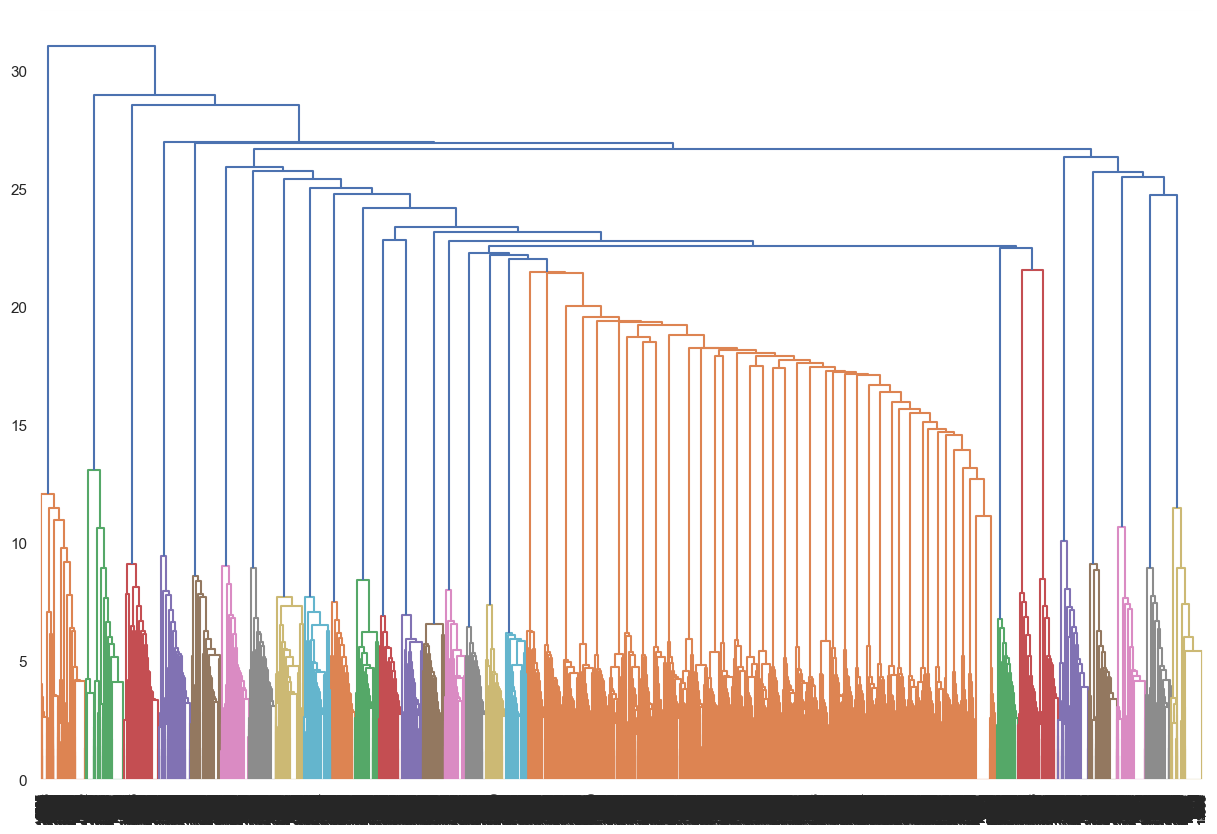

In [40]:
# Create Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, 'ward')

plt.figure(figsize=(15, 10))
# Create a dendrogram
dendrogram(Z, labels=df.index.values.tolist(), leaf_rotation=90, leaf_font_size=8)

# Show the plot
plt.show()